## Data Preprocessing (Training Dataset)

### Import Libraries

In [ ]:
%%time

!pip install --upgrade tensorflow
!pip install tensorflow keras
!pip install --upgrade tensorflow keras
!pip install keras
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as keras
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imutils
import cv2
import PIL.Image
import os
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 28.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfull

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Glioma Tumor

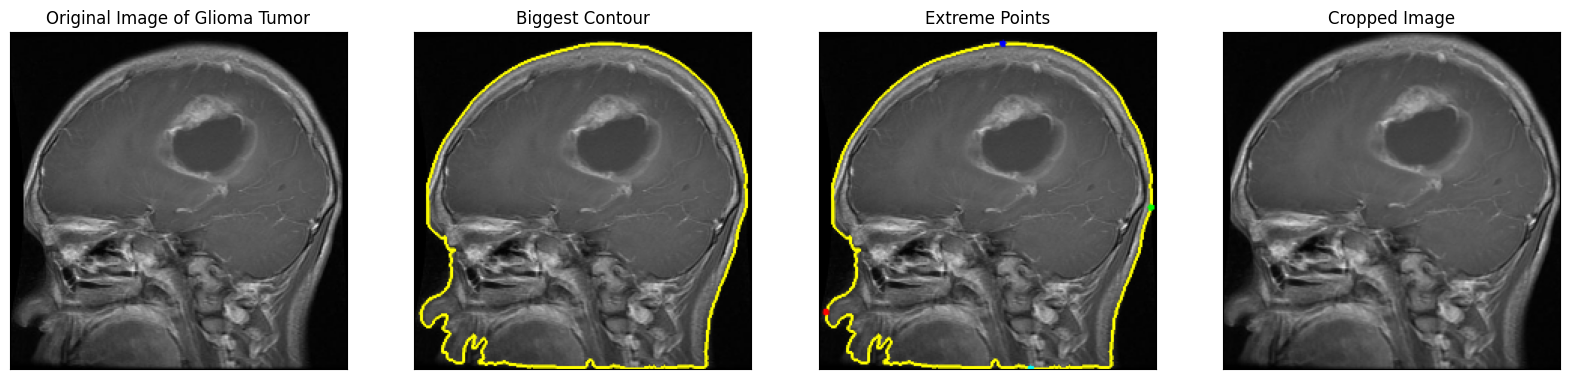

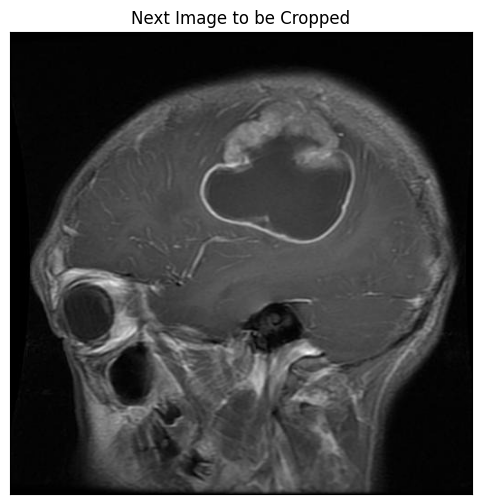

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


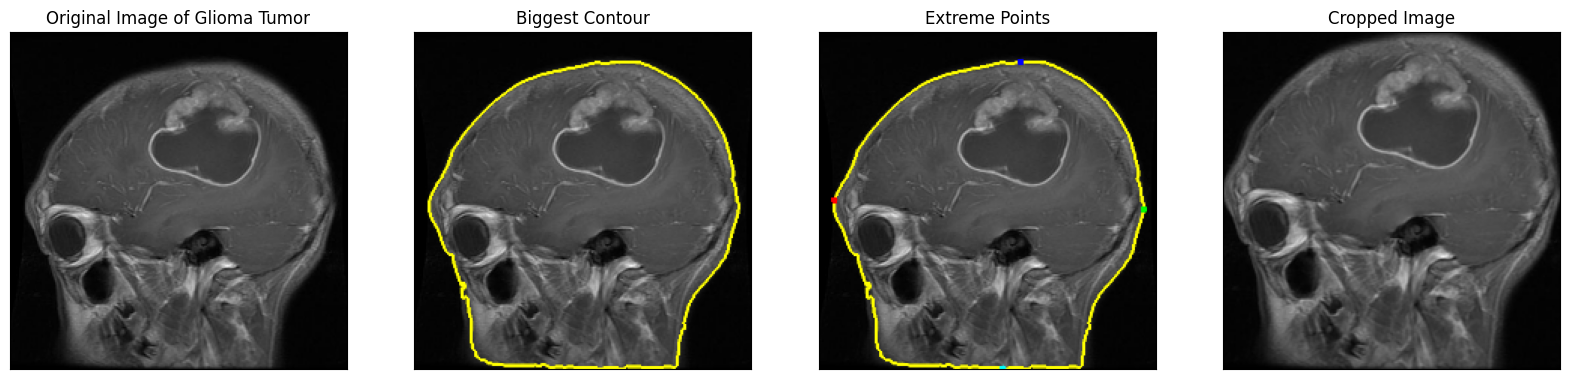

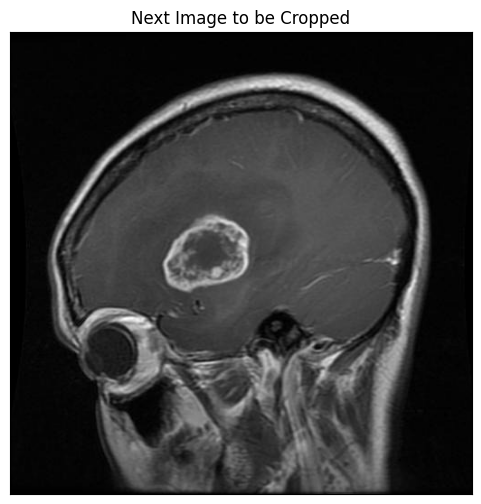

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


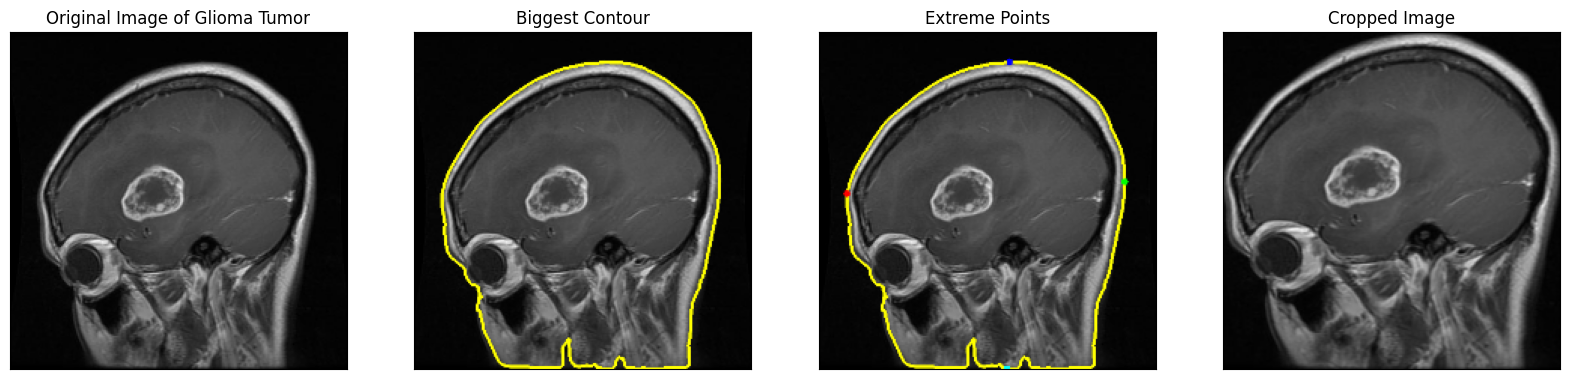

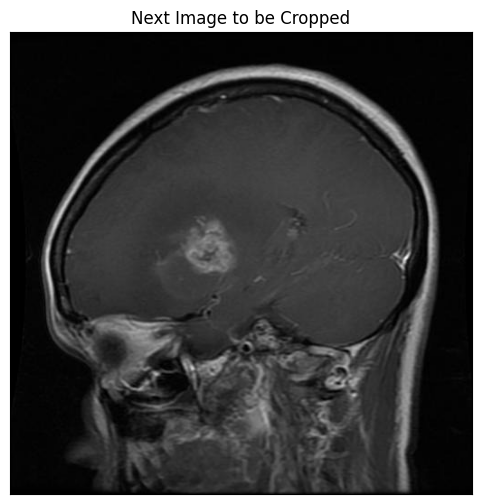

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


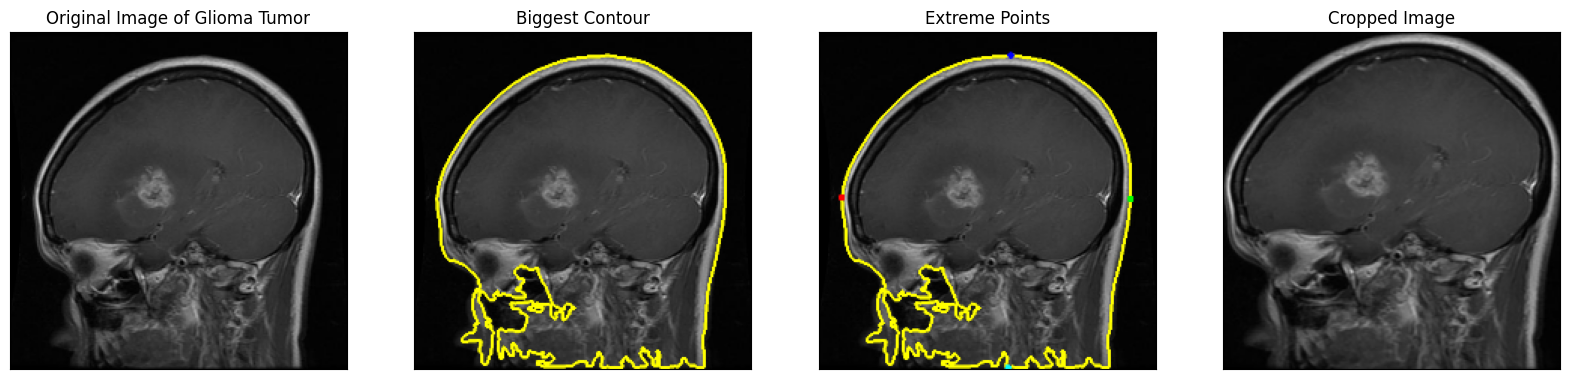

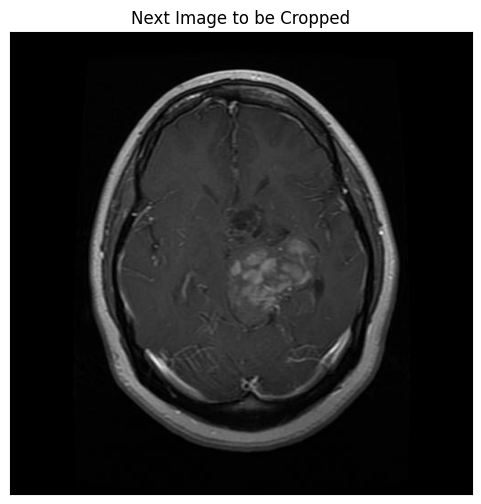

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


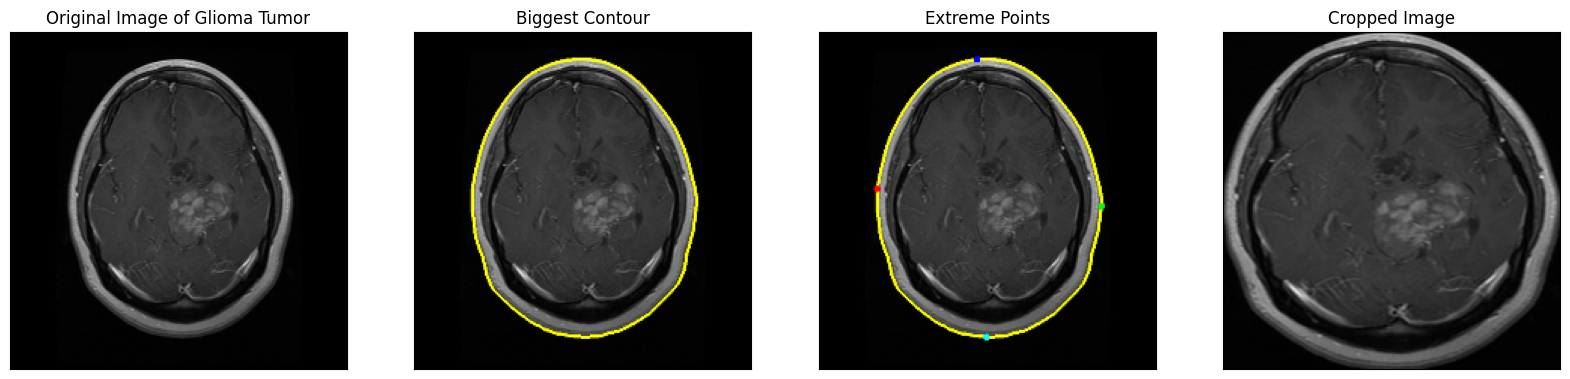

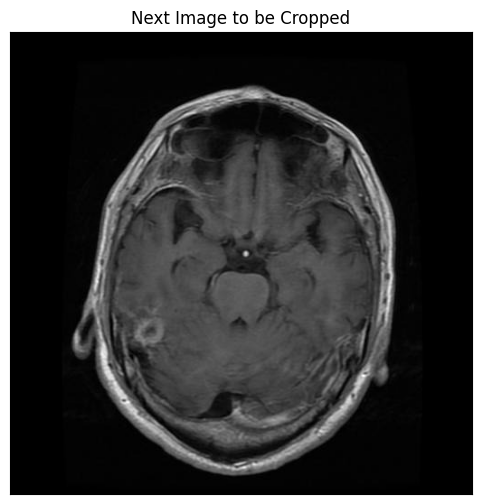

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: q
All remaining images have been processed and saved.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import imutils
import psutil
import resource
import tracemalloc

def cropandalter():
    flag1 = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)
    ADD_PIXELS = 0

    directory_g = ["//content//gdrive//My Drive//Masters Project//Brain Tumor Classification//Training//glioma_tumor"]
    directory_output_g = ["//content//gdrive//My Drive//Masters Project//Final Dataset//crop//Training_Output_r//glioma_tumor_Output_r"]

    tracemalloc.start()

    def process_image(image_path, output_folder, display=False):
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        equ = cv2.equalizeHist(gray)
        thresh = cv2.threshold(gray, 40, 250, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extremeL = tuple(c[c[:, :, 0].argmin()][0])
        extremeR = tuple(c[c[:, :, 0].argmax()][0])
        extremeT = tuple(c[c[:, :, 1].argmin()][0])
        extremeB = tuple(c[c[:, :, 1].argmax()][0])

        img_cntr = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
        img_point = cv2.circle(img_cntr.copy(), extremeL, 5, (0, 0, 255), -1)
        img_point = cv2.circle(img_point, extremeR, 5, (0, 255, 0), -1)
        img_point = cv2.circle(img_point, extremeT, 5, (255, 0, 0), -1)
        img_point = cv2.circle(img_point, extremeB, 5, (255, 255, 0), -1)

        new_img = image[extremeT[1] - ADD_PIXELS:extremeB[1] + ADD_PIXELS, extremeL[0] - ADD_PIXELS:extremeR[0] + ADD_PIXELS].copy()
        resized_img = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)

        cv2.imwrite(os.path.join(output_folder, f'gtr_{os.path.basename(image_path)}'), resized_img)

        if display:
            plt.figure(figsize=(20, 6))
            plt.subplot(141)
            plt.imshow(cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Original Image of Glioma Tumor')
            plt.subplot(142)
            plt.imshow(cv2.resize(cv2.cvtColor(img_cntr, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Biggest Contour')
            plt.subplot(143)
            plt.imshow(cv2.resize(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Extreme Points')
            plt.subplot(144)
            plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
            plt.title('Cropped Image')
            plt.show()

    for input_folder_g in directory_g:
        for output_folder_g in directory_output_g:
            if not os.path.exists(output_folder_g):
                os.makedirs(output_folder_g)

            images = os.listdir(input_folder_g)
            for i, img in enumerate(images):
                image_path = os.path.join(input_folder_g, img)
                display = True  # Always display the processed images
                process_image(image_path, output_folder_g, display)

                if i < len(images) - 1:  # Display the next image before asking for input
                    next_image_path = os.path.join(input_folder_g, images[i + 1])
                    next_image = cv2.imread(next_image_path)
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(next_image, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('Next Image to be Cropped')
                    plt.show()

                user_input = input("Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: ").strip().lower()
                if user_input == 'q':
                    for remaining_img in images[i + 1:]:
                        remaining_image_path = os.path.join(input_folder_g, remaining_img)
                        process_image(remaining_image_path, output_folder_g, display=False)
                    print("All remaining images have been processed and saved.")
                    return
                elif user_input != 'n':
                    print("Invalid input. Please enter 'n' or 'q'.")
                    continue

    def print_memory_usage():
        process = psutil.Process(os.getpid())
        mem_info = process.memory_info()
        print(f"RSS: {mem_info.rss / 1024 ** 2:.2f} MB")
        print(f"VMS: {mem_info.vms / 1024 ** 2:.2f} MB")

    def print_cpu_usage():
        print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

    def print_disk_usage():
        disk_usage = psutil.disk_usage('/')
        print(f"Total Disk Space: {disk_usage.total / 1024 ** 3:.2f} GB")
        print(f"Used Disk Space: {disk_usage.used / 1024 ** 3:.2f} GB")
        print(f"Disk Usage: {disk_usage.percent}%")

    def print_resource_usage():
        usage = resource.getrusage(resource.RUSAGE_SELF)
        print(f"User CPU time: {usage.ru_utime:.2f} seconds")
        print(f"System CPU time: {usage.ru_stime:.2f} seconds")

    def print_tracemalloc_usage():
        current, peak = tracemalloc.get_traced_memory()
        print(f"Current Memory Usage: {current / 1024 ** 2:.2f} MB")
        print(f"Peak Memory Usage: {peak / 1024 ** 2:.2f} MB")
    print_memory_usage()
    print_cpu_usage()
    print_disk_usage()
    print_resource_usage()
    print_tracemalloc_usage()

cropandalter()


### Meningioma Tumor

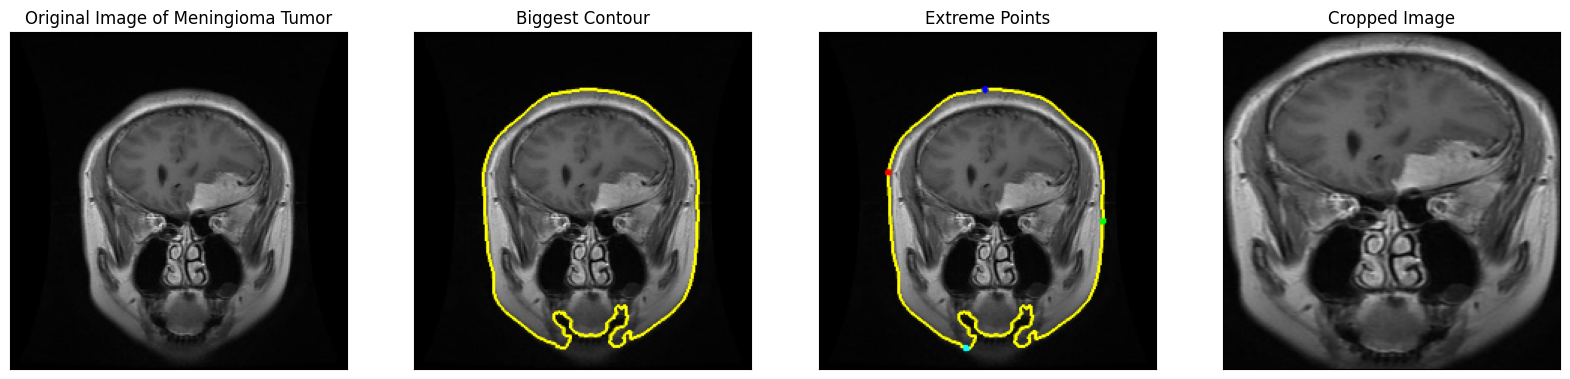

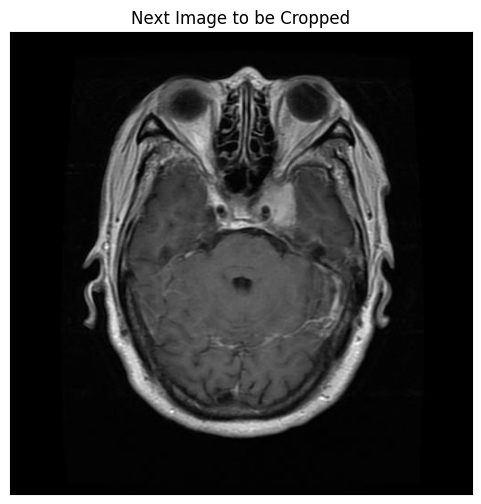

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


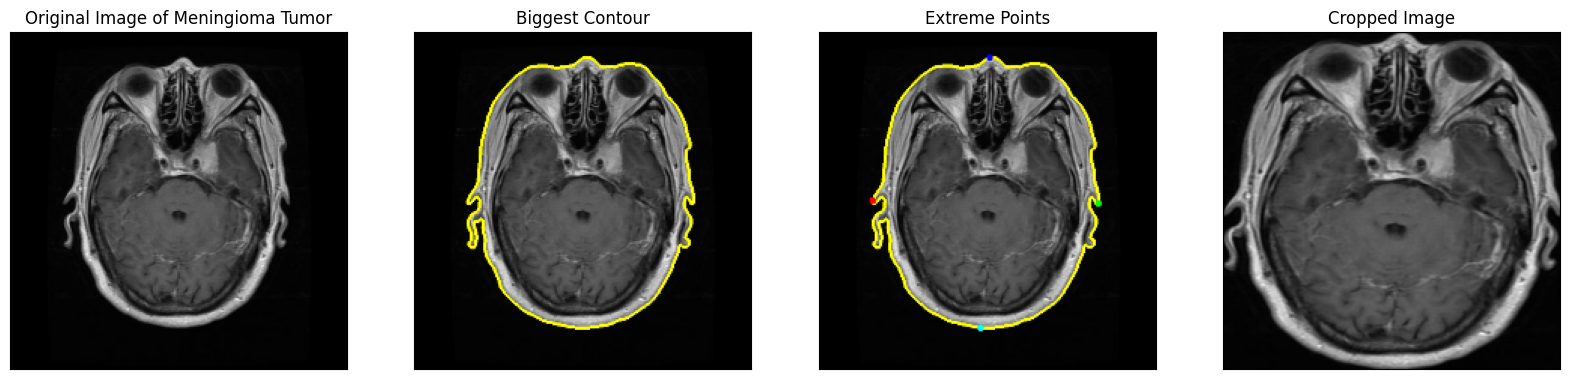

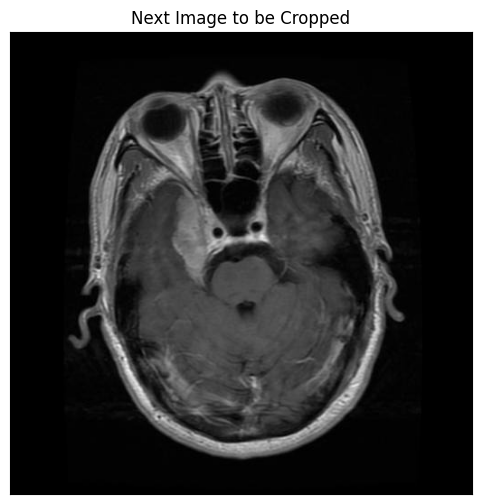

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


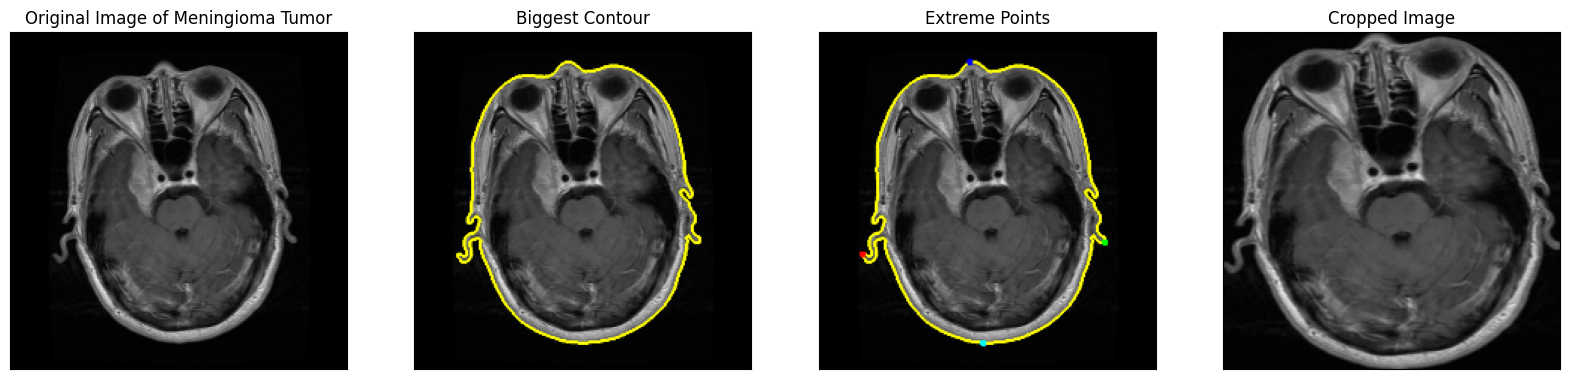

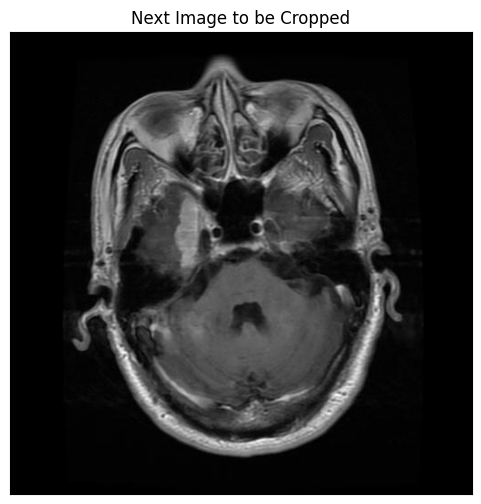

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


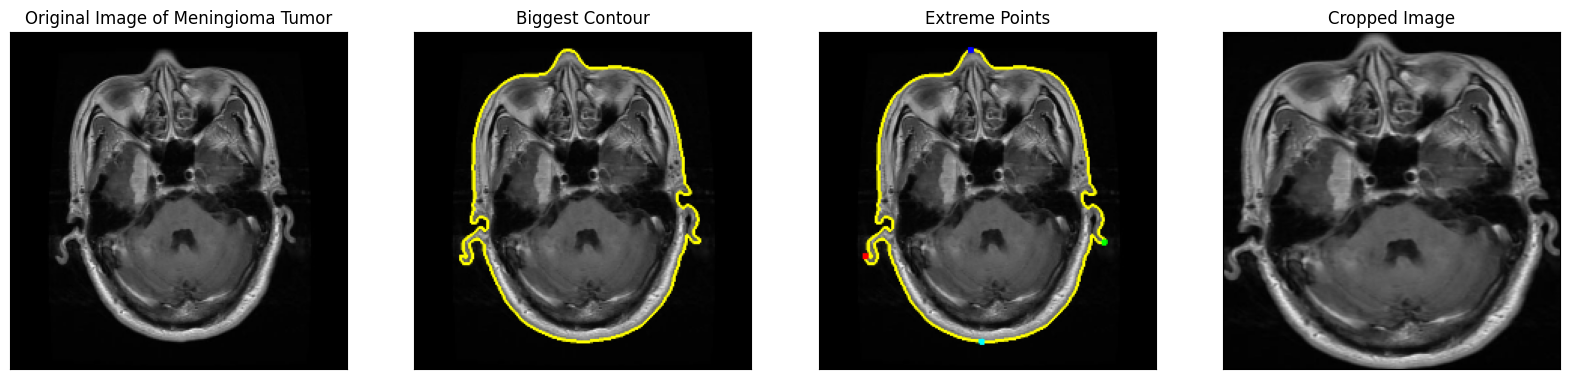

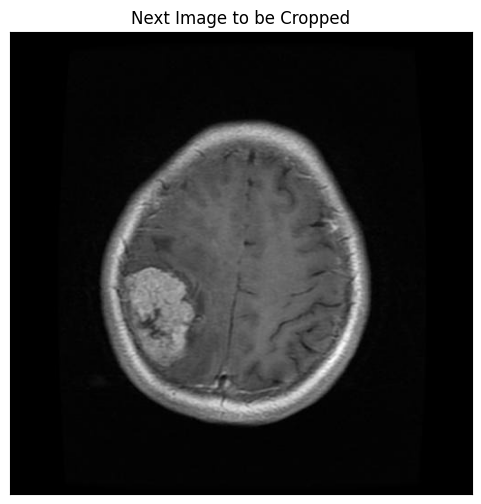

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: q
All remaining images have been processed and saved.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import imutils
import psutil
import resource
import tracemalloc

def cropandalter():
    flag1 = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)
    ADD_PIXELS = 0

    directory_g = ["//content//gdrive//My Drive//Masters Project//Brain Tumor Classification//Training//meningioma_tumor"]
    directory_output_g = ["//content//gdrive//My Drive//Masters Project//Final Dataset//crop//Training_Output_r//meningioma_tumor_Output_r"]

    tracemalloc.start()

    def process_image(image_path, output_folder, display=False):
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        equ = cv2.equalizeHist(gray)
        thresh = cv2.threshold(gray, 40, 250, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extremeL = tuple(c[c[:, :, 0].argmin()][0])
        extremeR = tuple(c[c[:, :, 0].argmax()][0])
        extremeT = tuple(c[c[:, :, 1].argmin()][0])
        extremeB = tuple(c[c[:, :, 1].argmax()][0])

        img_cntr = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
        img_point = cv2.circle(img_cntr.copy(), extremeL, 5, (0, 0, 255), -1)
        img_point = cv2.circle(img_point, extremeR, 5, (0, 255, 0), -1)
        img_point = cv2.circle(img_point, extremeT, 5, (255, 0, 0), -1)
        img_point = cv2.circle(img_point, extremeB, 5, (255, 255, 0), -1)

        new_img = image[extremeT[1] - ADD_PIXELS:extremeB[1] + ADD_PIXELS, extremeL[0] - ADD_PIXELS:extremeR[0] + ADD_PIXELS].copy()
        resized_img = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)

        cv2.imwrite(os.path.join(output_folder, f'mtr_{os.path.basename(image_path)}'), resized_img)

        if display:
            plt.figure(figsize=(20, 6))
            plt.subplot(141)
            plt.imshow(cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Original Image of Meningioma Tumor')
            plt.subplot(142)
            plt.imshow(cv2.resize(cv2.cvtColor(img_cntr, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Biggest Contour')
            plt.subplot(143)
            plt.imshow(cv2.resize(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Extreme Points')
            plt.subplot(144)
            plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
            plt.title('Cropped Image')
            plt.show()

    for input_folder_g in directory_g:
        for output_folder_g in directory_output_g:
            if not os.path.exists(output_folder_g):
                os.makedirs(output_folder_g)

            images = os.listdir(input_folder_g)
            for i, img in enumerate(images):
                image_path = os.path.join(input_folder_g, img)
                display = True  # Always display the processed images
                process_image(image_path, output_folder_g, display)

                if i < len(images) - 1:  # Display the next image before asking for input
                    next_image_path = os.path.join(input_folder_g, images[i + 1])
                    next_image = cv2.imread(next_image_path)
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(next_image, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('Next Image to be Cropped')
                    plt.show()

                user_input = input("Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: ").strip().lower()
                if user_input == 'q':
                    for remaining_img in images[i + 1:]:
                        remaining_image_path = os.path.join(input_folder_g, remaining_img)
                        process_image(remaining_image_path, output_folder_g, display=False)
                    print("All remaining images have been processed and saved.")
                    return
                elif user_input != 'n':
                    print("Invalid input. Please enter 'n' or 'q'.")
                    continue

    def print_memory_usage():
        process = psutil.Process(os.getpid())
        mem_info = process.memory_info()
        print(f"RSS: {mem_info.rss / 1024 ** 2:.2f} MB")
        print(f"VMS: {mem_info.vms / 1024 ** 2:.2f} MB")

    def print_cpu_usage():
        print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

    def print_disk_usage():
        disk_usage = psutil.disk_usage('/')
        print(f"Total Disk Space: {disk_usage.total / 1024 ** 3:.2f} GB")
        print(f"Used Disk Space: {disk_usage.used / 1024 ** 3:.2f} GB")
        print(f"Disk Usage: {disk_usage.percent}%")

    def print_resource_usage():
        usage = resource.getrusage(resource.RUSAGE_SELF)
        print(f"User CPU time: {usage.ru_utime:.2f} seconds")
        print(f"System CPU time: {usage.ru_stime:.2f} seconds")

    def print_tracemalloc_usage():
        current, peak = tracemalloc.get_traced_memory()
        print(f"Current Memory Usage: {current / 1024 ** 2:.2f} MB")
        print(f"Peak Memory Usage: {peak / 1024 ** 2:.2f} MB")
    print_memory_usage()
    print_cpu_usage()
    print_disk_usage()
    print_resource_usage()
    print_tracemalloc_usage()

cropandalter()


### Pituitary Tumor

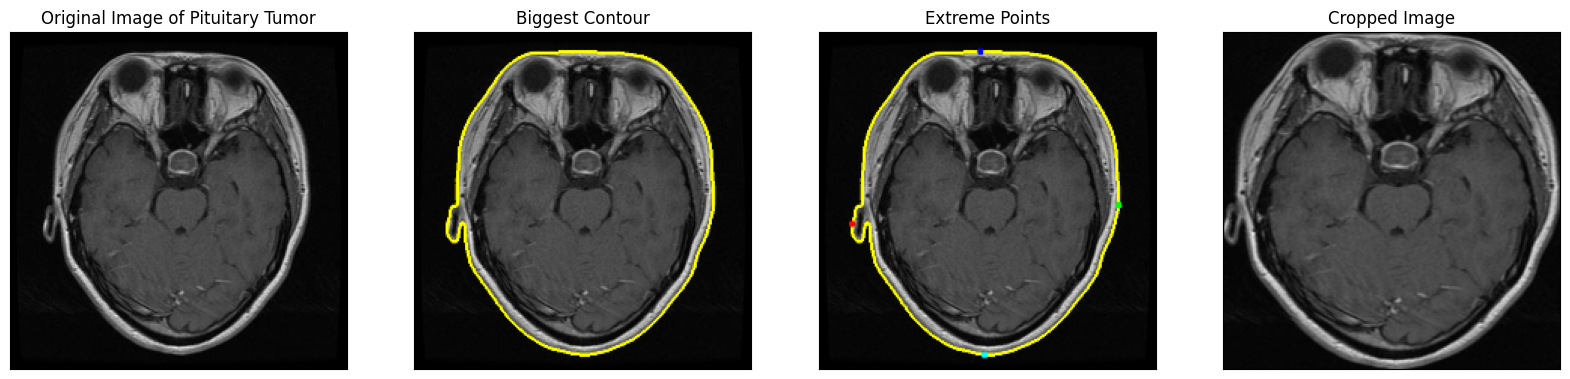

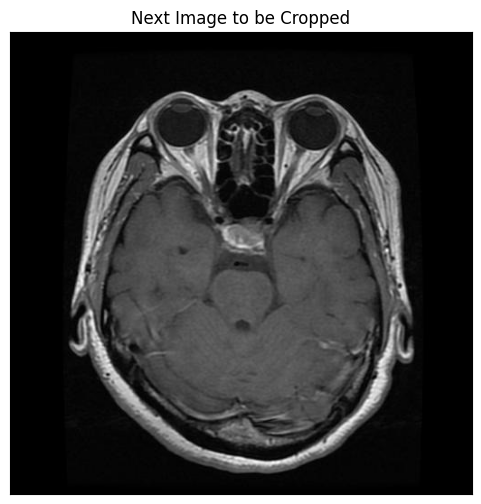

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


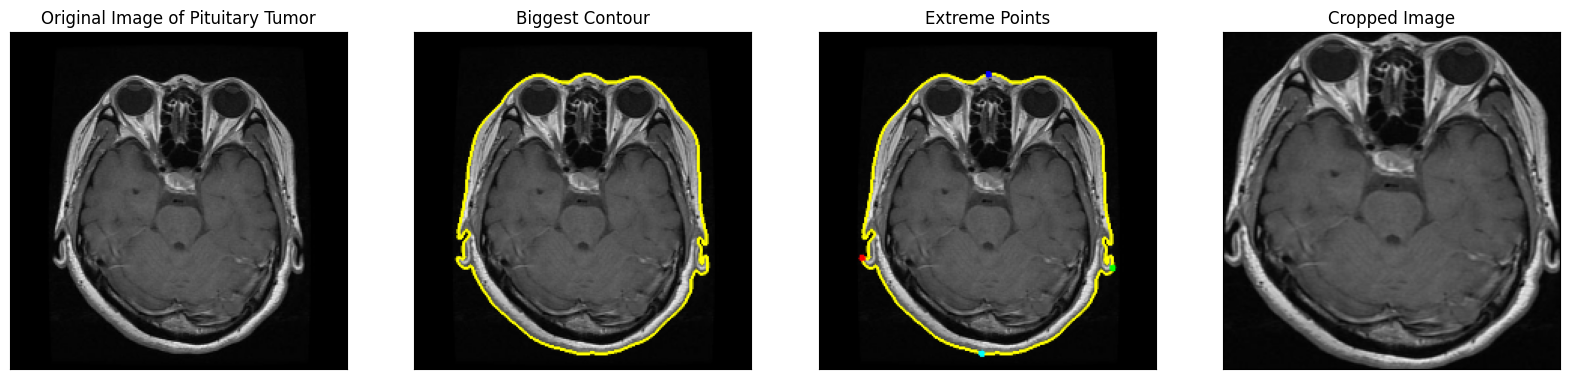

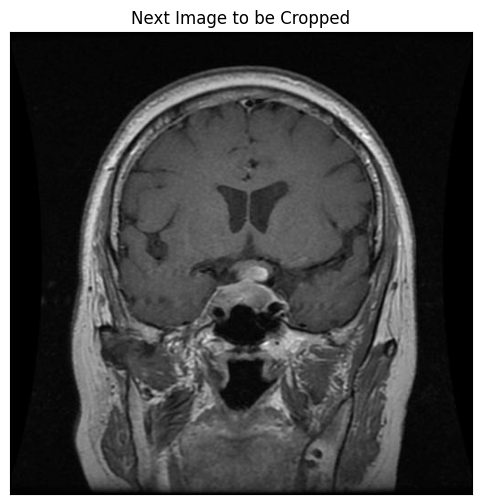

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


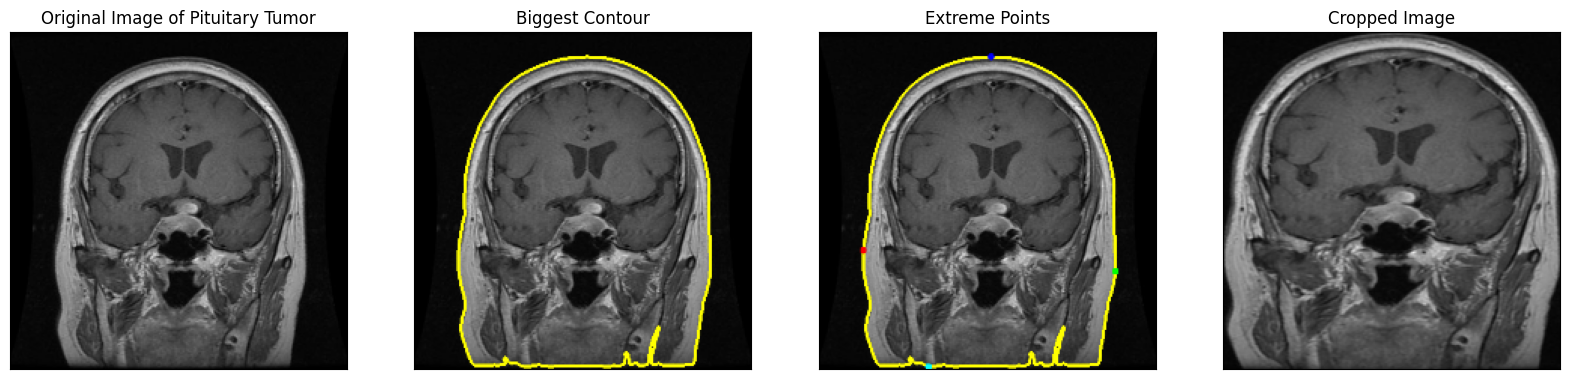

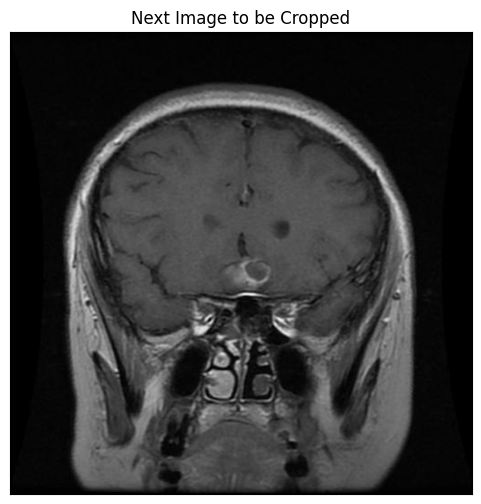

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: q
All remaining images have been processed and saved.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import imutils
import psutil
import resource
import tracemalloc

def cropandalter():
    flag1 = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)
    ADD_PIXELS = 0

    directory_g = ["//content//gdrive//My Drive//Masters Project//Brain Tumor Classification//Training//pituitary_tumor"]
    directory_output_g = ["//content//gdrive//My Drive//Masters Project//Final Dataset//crop//Training_Output_r//pituitary_tumor_Output_r"]

    tracemalloc.start()

    def process_image(image_path, output_folder, display=False):
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        equ = cv2.equalizeHist(gray)
        thresh = cv2.threshold(gray, 40, 250, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extremeL = tuple(c[c[:, :, 0].argmin()][0])
        extremeR = tuple(c[c[:, :, 0].argmax()][0])
        extremeT = tuple(c[c[:, :, 1].argmin()][0])
        extremeB = tuple(c[c[:, :, 1].argmax()][0])

        img_cntr = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
        img_point = cv2.circle(img_cntr.copy(), extremeL, 5, (0, 0, 255), -1)
        img_point = cv2.circle(img_point, extremeR, 5, (0, 255, 0), -1)
        img_point = cv2.circle(img_point, extremeT, 5, (255, 0, 0), -1)
        img_point = cv2.circle(img_point, extremeB, 5, (255, 255, 0), -1)

        new_img = image[extremeT[1] - ADD_PIXELS:extremeB[1] + ADD_PIXELS, extremeL[0] - ADD_PIXELS:extremeR[0] + ADD_PIXELS].copy()
        resized_img = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)

        cv2.imwrite(os.path.join(output_folder, f'ptr_{os.path.basename(image_path)}'), resized_img)

        if display:
            plt.figure(figsize=(20, 6))
            plt.subplot(141)
            plt.imshow(cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Original Image of Pituitary Tumor')
            plt.subplot(142)
            plt.imshow(cv2.resize(cv2.cvtColor(img_cntr, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Biggest Contour')
            plt.subplot(143)
            plt.imshow(cv2.resize(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Extreme Points')
            plt.subplot(144)
            plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
            plt.title('Cropped Image')
            plt.show()

    for input_folder_g in directory_g:
        for output_folder_g in directory_output_g:
            if not os.path.exists(output_folder_g):
                os.makedirs(output_folder_g)

            images = os.listdir(input_folder_g)
            for i, img in enumerate(images):
                image_path = os.path.join(input_folder_g, img)
                display = True  # Always display the processed images
                process_image(image_path, output_folder_g, display)

                if i < len(images) - 1:  # Display the next image before asking for input
                    next_image_path = os.path.join(input_folder_g, images[i + 1])
                    next_image = cv2.imread(next_image_path)
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(next_image, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('Next Image to be Cropped')
                    plt.show()

                user_input = input("Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: ").strip().lower()
                if user_input == 'q':
                    for remaining_img in images[i + 1:]:
                        remaining_image_path = os.path.join(input_folder_g, remaining_img)
                        process_image(remaining_image_path, output_folder_g, display=False)
                    print("All remaining images have been processed and saved.")
                    return
                elif user_input != 'n':
                    print("Invalid input. Please enter 'n' or 'q'.")
                    continue

    def print_memory_usage():
        process = psutil.Process(os.getpid())
        mem_info = process.memory_info()
        print(f"RSS: {mem_info.rss / 1024 ** 2:.2f} MB")
        print(f"VMS: {mem_info.vms / 1024 ** 2:.2f} MB")

    def print_cpu_usage():
        print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

    def print_disk_usage():
        disk_usage = psutil.disk_usage('/')
        print(f"Total Disk Space: {disk_usage.total / 1024 ** 3:.2f} GB")
        print(f"Used Disk Space: {disk_usage.used / 1024 ** 3:.2f} GB")
        print(f"Disk Usage: {disk_usage.percent}%")

    def print_resource_usage():
        usage = resource.getrusage(resource.RUSAGE_SELF)
        print(f"User CPU time: {usage.ru_utime:.2f} seconds")
        print(f"System CPU time: {usage.ru_stime:.2f} seconds")

    def print_tracemalloc_usage():
        current, peak = tracemalloc.get_traced_memory()
        print(f"Current Memory Usage: {current / 1024 ** 2:.2f} MB")
        print(f"Peak Memory Usage: {peak / 1024 ** 2:.2f} MB")
    print_memory_usage()
    print_cpu_usage()
    print_disk_usage()
    print_resource_usage()
    print_tracemalloc_usage()

cropandalter()


### No Tumor

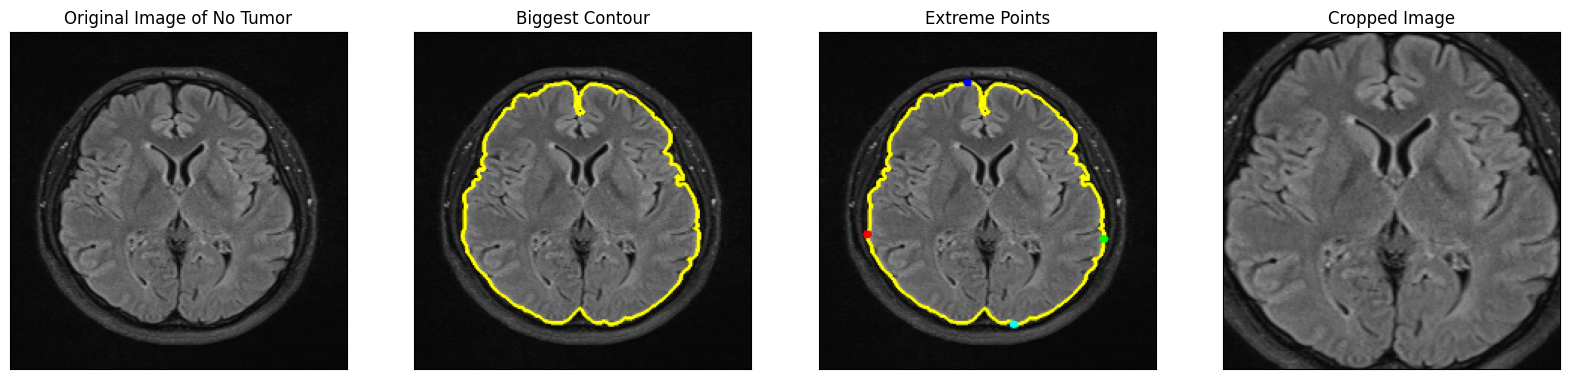

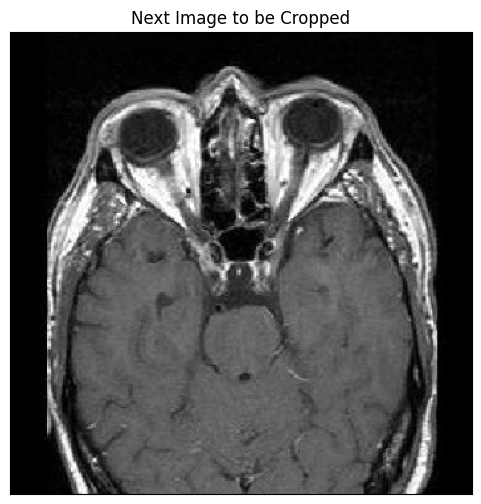

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


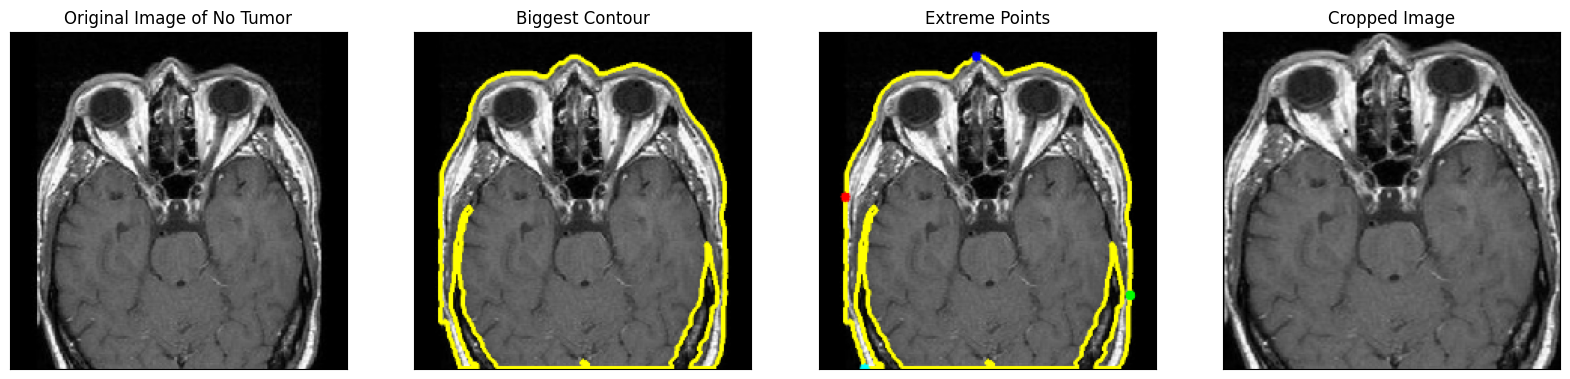

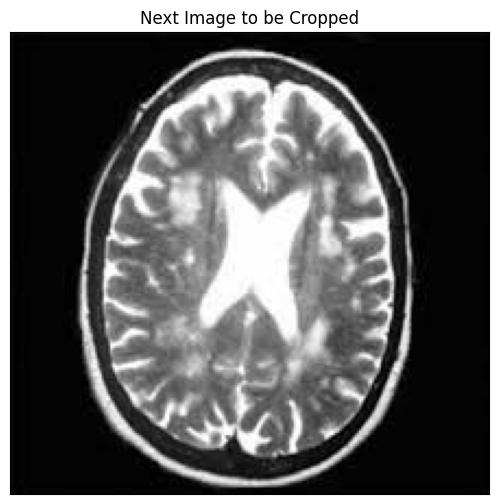

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


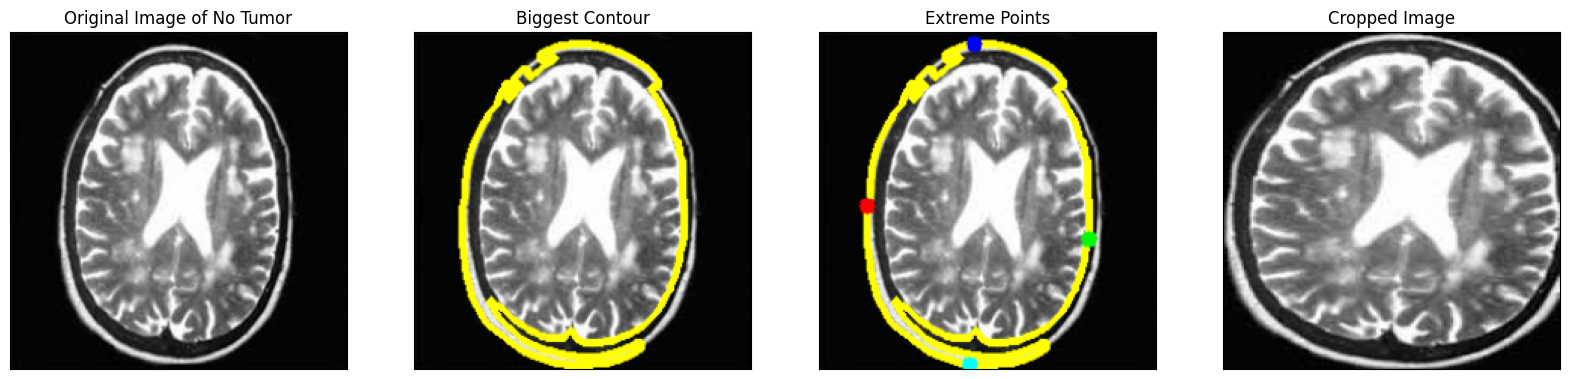

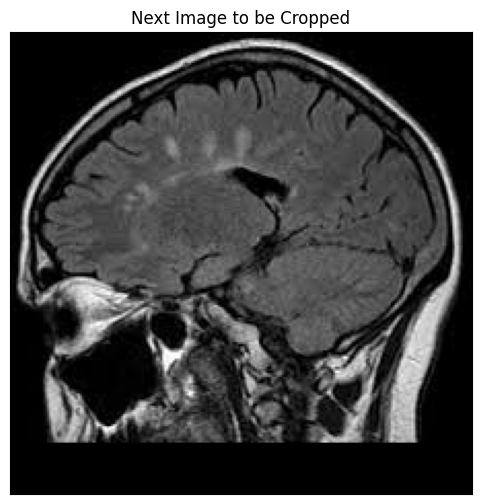

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


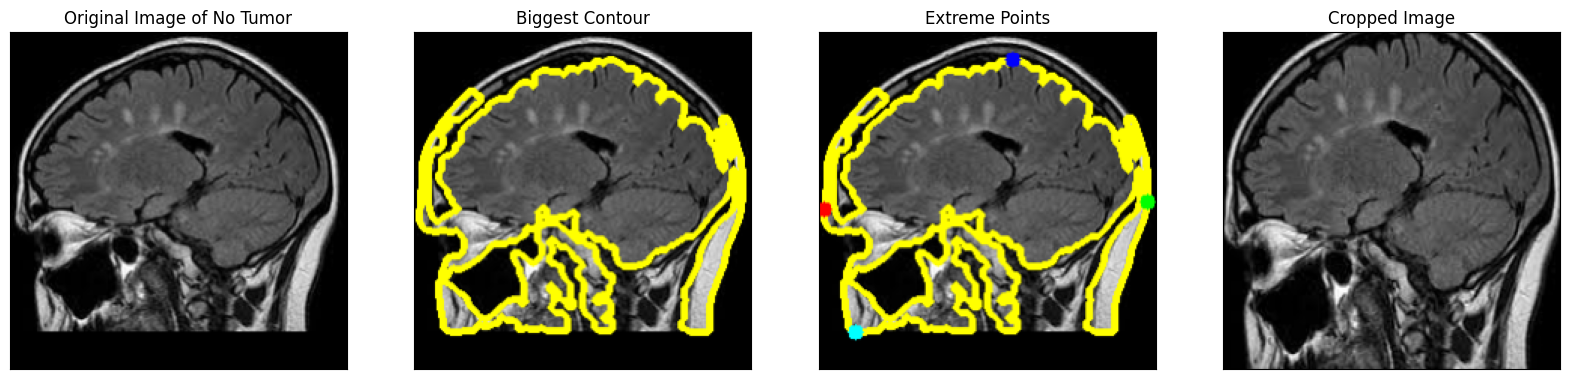

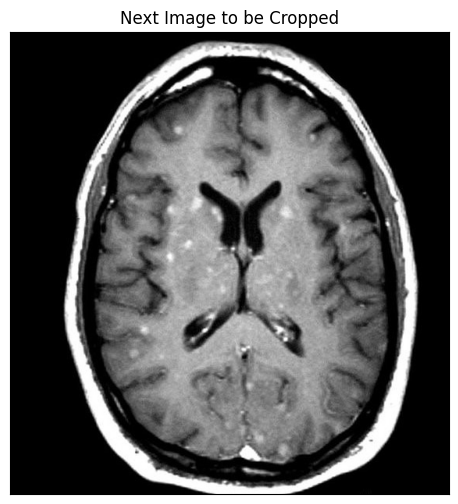

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


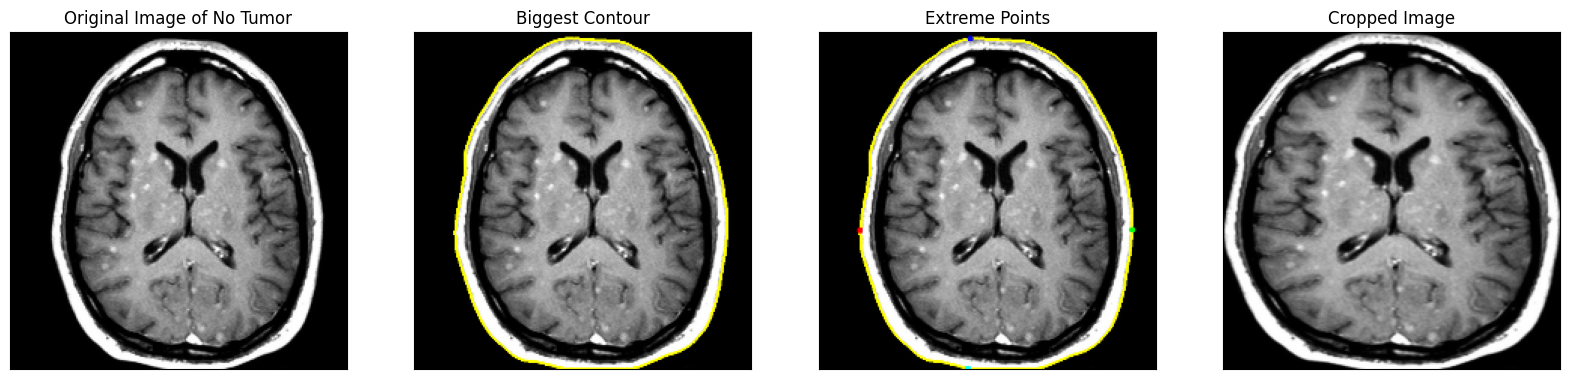

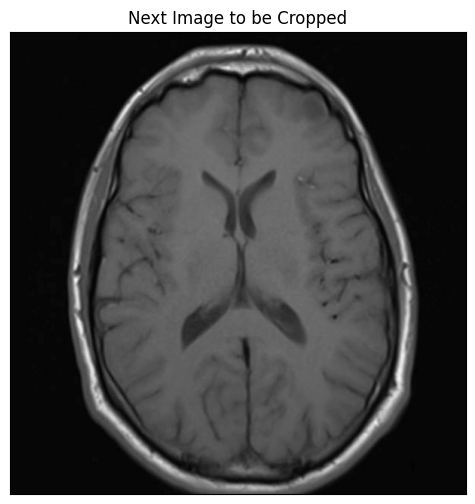

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: n


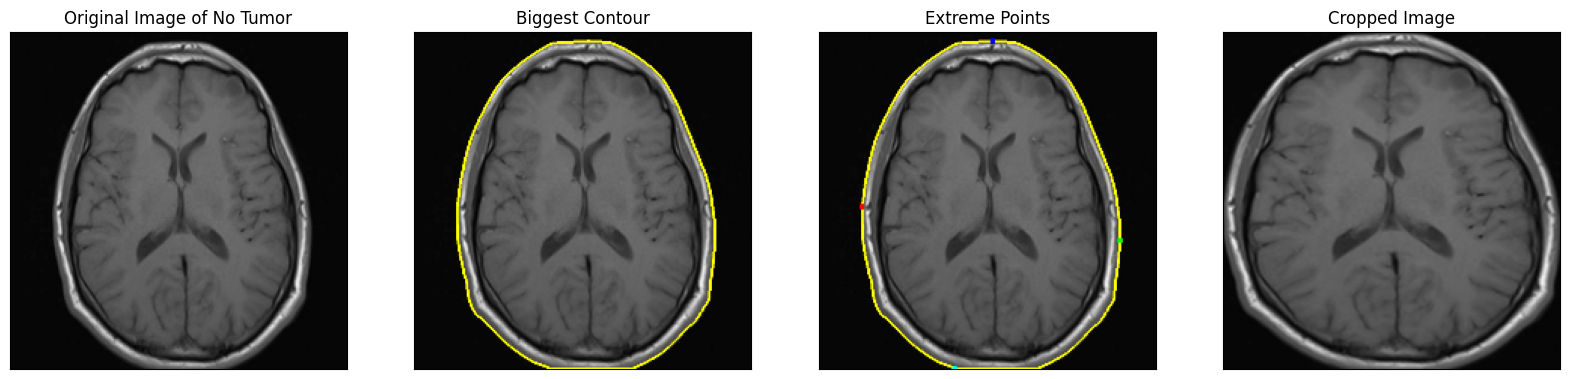

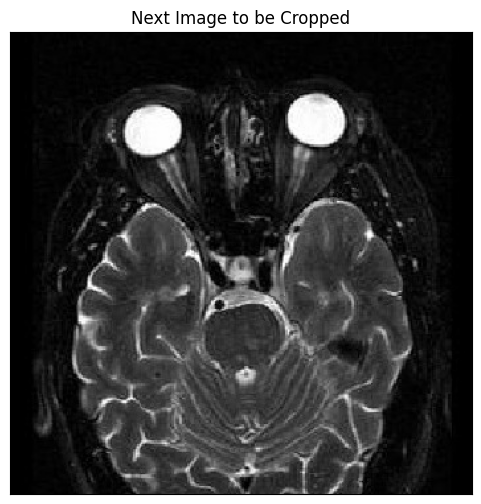

Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: q
All remaining images have been processed and saved.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import imutils
import psutil
import resource
import tracemalloc

def cropandalter():
    flag1 = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)
    ADD_PIXELS = 0

    directory_g = ["//content//gdrive//My Drive//Masters Project//Brain Tumor Classification//Training//no_tumor"]
    directory_output_g = ["//content//gdrive//My Drive//Masters Project//Final Dataset//crop//Training_Output_r//no_tumor_Output_r"]

    tracemalloc.start()

    def process_image(image_path, output_folder, display=False):
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        equ = cv2.equalizeHist(gray)
        thresh = cv2.threshold(gray, 40, 250, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extremeL = tuple(c[c[:, :, 0].argmin()][0])
        extremeR = tuple(c[c[:, :, 0].argmax()][0])
        extremeT = tuple(c[c[:, :, 1].argmin()][0])
        extremeB = tuple(c[c[:, :, 1].argmax()][0])

        img_cntr = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
        img_point = cv2.circle(img_cntr.copy(), extremeL, 5, (0, 0, 255), -1)
        img_point = cv2.circle(img_point, extremeR, 5, (0, 255, 0), -1)
        img_point = cv2.circle(img_point, extremeT, 5, (255, 0, 0), -1)
        img_point = cv2.circle(img_point, extremeB, 5, (255, 255, 0), -1)

        new_img = image[extremeT[1] - ADD_PIXELS:extremeB[1] + ADD_PIXELS, extremeL[0] - ADD_PIXELS:extremeR[0] + ADD_PIXELS].copy()
        resized_img = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)

        cv2.imwrite(os.path.join(output_folder, f'ntr_{os.path.basename(image_path)}'), resized_img)

        if display:
            plt.figure(figsize=(20, 6))
            plt.subplot(141)
            plt.imshow(cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Original Image of No Tumor')
            plt.subplot(142)
            plt.imshow(cv2.resize(cv2.cvtColor(img_cntr, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Biggest Contour')
            plt.subplot(143)
            plt.imshow(cv2.resize(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB), dim))
            plt.xticks([])
            plt.yticks([])
            plt.title('Extreme Points')
            plt.subplot(144)
            plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
            plt.title('Cropped Image')
            plt.show()

    for input_folder_g in directory_g:
        for output_folder_g in directory_output_g:
            if not os.path.exists(output_folder_g):
                os.makedirs(output_folder_g)

            images = os.listdir(input_folder_g)
            for i, img in enumerate(images):
                image_path = os.path.join(input_folder_g, img)
                display = True  # Always display the processed images
                process_image(image_path, output_folder_g, display)

                if i < len(images) - 1:  # Display the next image before asking for input
                    next_image_path = os.path.join(input_folder_g, images[i + 1])
                    next_image = cv2.imread(next_image_path)
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(next_image, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('Next Image to be Cropped')
                    plt.show()

                user_input = input("Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: ").strip().lower()
                if user_input == 'q':
                    for remaining_img in images[i + 1:]:
                        remaining_image_path = os.path.join(input_folder_g, remaining_img)
                        process_image(remaining_image_path, output_folder_g, display=False)
                    print("All remaining images have been processed and saved.")
                    return
                elif user_input != 'n':
                    print("Invalid input. Please enter 'n' or 'q'.")
                    continue

    def print_memory_usage():
        process = psutil.Process(os.getpid())
        mem_info = process.memory_info()
        print(f"RSS: {mem_info.rss / 1024 ** 2:.2f} MB")
        print(f"VMS: {mem_info.vms / 1024 ** 2:.2f} MB")

    def print_cpu_usage():
        print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

    def print_disk_usage():
        disk_usage = psutil.disk_usage('/')
        print(f"Total Disk Space: {disk_usage.total / 1024 ** 3:.2f} GB")
        print(f"Used Disk Space: {disk_usage.used / 1024 ** 3:.2f} GB")
        print(f"Disk Usage: {disk_usage.percent}%")

    def print_resource_usage():
        usage = resource.getrusage(resource.RUSAGE_SELF)
        print(f"User CPU time: {usage.ru_utime:.2f} seconds")
        print(f"System CPU time: {usage.ru_stime:.2f} seconds")

    def print_tracemalloc_usage():
        current, peak = tracemalloc.get_traced_memory()
        print(f"Current Memory Usage: {current / 1024 ** 2:.2f} MB")
        print(f"Peak Memory Usage: {peak / 1024 ** 2:.2f} MB")
    print_memory_usage()
    print_cpu_usage()
    print_disk_usage()
    print_resource_usage()
    print_tracemalloc_usage()

cropandalter()
